In [ ]:
from google.colab import drive
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')

In [ ]:
##### TODO CHANGE THIS TO THE PATH IN GOOGLE DRIVE WHERE YOU COPIED THE ch03 FOLDER #####
google_drive_root='/Style Transfer'

In [ ]:
google_drive_mount_location = '/content/drive'
google_file_prefix=google_drive_mount_location + '/My Drive/' + google_drive_root + '/'

In [ ]:
# Read more here: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=D78AM1fFt2ty
from google.colab import drive
drive.mount(google_drive_mount_location)

Mounted at /content/drive


In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [ ]:
##Getting stylization model 
model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

In [ ]:
#Preprocess & load images
#Load using tf, decode to make sure there are 3 channels, reformat it so that its in float 32 format, and add a new axis.
def load_img(img_path):
  img = tf.io.read_file(img_path)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  img = img[tf.newaxis, :]
  return img

In [ ]:
#Loading images
content_image = load_img(google_file_prefix + '/klimt.jpg')
style_image = load_img(google_file_prefix + '/portfolio.jpg')

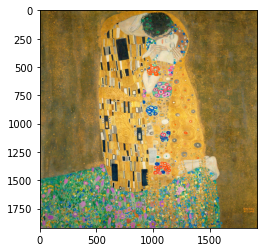

In [ ]:
#Visualizing the output
plt.imshow(np.squeeze(content_image))

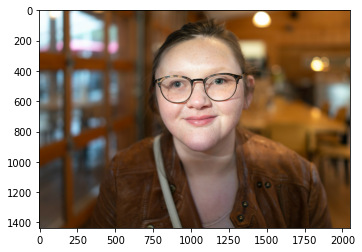

In [ ]:
plt.imshow(np.squeeze(style_image))

In [ ]:
## Performing the style transfer
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

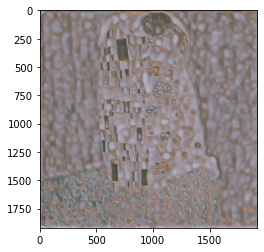

In [ ]:
plt.imshow(np.squeeze(stylized_image))

In [ ]:
cv2.imwrite(google_file_prefix + "/monet-fox.jpg", cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True